In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = tf.keras.datasets.cifar10.load_data()
x_train_normalize = x_train_image.astype('float32')/255
x_test_normalize = x_test_image.astype('float32')/255
y_train_OneHot = tf.keras.utils.to_categorical(y_train_label)
y_test_OneHot = tf.keras.utils.to_categorical(y_test_label)

In [33]:
model = tf.keras.models.Sequential()
#input()
model.add(keras.layers.Conv2D(filters=48,kernel_size=8,strides=4,input_shape=(32,32,3),padding='same',activation='relu'))
#input(32,32,3) output(8,8,12)
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=3,strides=2,padding='same'))
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=3,strides=2,padding='same'))
model.add(keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'))
#model.add(keras.layers.Conv2D(filters=12,kernel_size=3,strides=1,padding='same',activation='relu'))
#model.add(keras.layers.Conv2D(filters=8,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=3,strides=2,padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))   #修正的输出

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 8, 8, 48)          9264      
_________________________________________________________________
batch_normalization_8 (Batch (None, 8, 8, 48)          192       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 48)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 64)          27712     
_________________________________________________________________
batch_normalization_9 (Batch (None, 4, 4, 64)          256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 2, 64)         

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_train = model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=30,batch_size=300,verbose=1)

Epoch 1/30
134/134 [==============================] - 1s 8ms/step - loss: 2.0696 - accuracy: 0.2470 - val_loss: 2.1492 - val_accuracy: 0.2152
Epoch 2/30
134/134 [==============================] - 1s 6ms/step - loss: 1.7167 - accuracy: 0.3762 - val_loss: 1.7877 - val_accuracy: 0.4232
Epoch 3/30
134/134 [==============================] - 1s 6ms/step - loss: 1.5609 - accuracy: 0.4402 - val_loss: 1.7153 - val_accuracy: 0.4036
Epoch 4/30
134/134 [==============================] - 1s 6ms/step - loss: 1.4587 - accuracy: 0.4830 - val_loss: 1.5653 - val_accuracy: 0.4244
Epoch 5/30
134/134 [==============================] - 1s 6ms/step - loss: 1.3870 - accuracy: 0.5138 - val_loss: 1.3715 - val_accuracy: 0.5186
Epoch 6/30
134/134 [==============================] - 1s 6ms/step - loss: 1.3203 - accuracy: 0.5364 - val_loss: 1.2952 - val_accuracy: 0.5380
Epoch 7/30
134/134 [==============================] - 1s 6ms/step - loss: 1.2795 - accuracy: 0.5513 - val_loss: 1.4672 - val_accuracy: 0.4707
Epoch 

In [36]:
def train_history(model_train,train,val):
    plt.plot(model_train.history[train])
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')

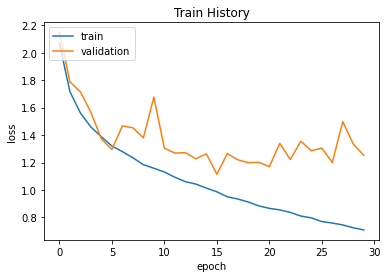

In [37]:
train_history(model_train,'loss','val_loss')

In [38]:
scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=2)

313/313 - 1s - loss: 1.2839 - accuracy: 0.6076


In [39]:
model.save('./MyAlex.h5', save_format="h5")

In [41]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils.generic_utils import CustomObjectScope
#model = tf.keras.models.load_model('MyAlex.h5')
#print(model.summary())

 
#keras_model = tf.keras_models.load_model("./MyAlex.h5")
keras_model =tf.keras.models.load_model ("./MyAlex.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

open("./MyAlex.tflite","wb").write(tflite_model)
 


327780

In [42]:


model = tf.keras.models.load_model('MyAlex.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 开启动态量化
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("myalex_converted_model_quantized.tflite", "wb").write(tflite_model)

88672